# Стохастический градиентный и координатный спуски

## Загрузка и подготовка данных (1 балл)

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [50]:
#ваш код 
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.linear_model import LinearRegression

px.defaults.template = 'plotly_dark'

In [51]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [52]:
#ваш код 
pd.DataFrame(data.isna().sum(), columns=['количество пропусков']).T

,TV,radio,newspaper,sales
количество пропусков,0,0,0,0


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [53]:
#ваш код 
X = data.drop(columns='sales').values
y = data['sales'].values

## Координатный спуск (2 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [54]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [55]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:**

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [56]:
# ваш код 
def coordinate_descent(X:np.ndarray, y:np.ndarray, n_iters=1000):
    
    n_cols = X.shape[1]
    w = np.zeros(n_cols)
    
    for iteration in range(n_iters):
        for column in range(n_cols):
            # делаем предсказание без текущего фактора
            y_pred = ((X[:, :column] @ w[:column]) + (X[:, column+1:] @ w[column+1:])).reshape(-1, 1)
            # обновляем значение коэффициента для текущего фактора
            w[column] = X[:, column].T @ (y - y_pred)
            
    # считаем значение функции потерь   
    y_hat = (X @ w).reshape(-1, 1)
    mse = np.power(y - y_hat, 2).mean()
    
    return w, mse

w, mse = coordinate_descent(X, y)
print(
    'Коэффициенты для модели:', w,
    '\nMSE:', mse
)

Коэффициенты для модели: [ 41.56217205 110.13144155  73.52860638  -0.55006384] 
MSE: 2.7841263145109365


C:\Users\Admin\AppData\Local\Temp\ipykernel_15656\2992513618.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[column] = X[:, column].T @ (y - y_pred)


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [58]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (7 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение**

In [59]:
#ваш код
X = data.drop(columns='sales').values
X = (X - X.mean(axis=0)) / X.std(axis=0)

**Добавим единичный столбец**

In [60]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse**

In [61]:
#ваш код
def mse_error(y_true:np.ndarray, y_pred:np.ndarray):
    return np.power(y_true - y_pred, 2).mean()

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза**

In [62]:
#ваш код
y_pred_mean = y.mean()
print('MSE в случае, если предсказывать продажи средним значением:', mse_error(y, y_pred_mean))

MSE в случае, если предсказывать продажи средним значением: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов**

In [63]:
#ваш код
def lin_pred(X:np.ndarray, w:np.ndarray):
    return (X @ w).reshape(-1, 1)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска.  
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [64]:
#ваш код
def stoch_grad_step(X:np.ndarray, y:np.ndarray, w:np.ndarray, train_ind:int, eta:float):
    # создадим нулевой вектор нужной размерности, в который будем записывать новые значения коэффициентов
    weights = np.zeros(shape=w.shape)
    
    for i in range(len(weights)):
        # в формуле не будем делить на количество элементов в выборке,
        # т.к. это количество всегда равно 1 в стохастическом град.спуске
        weights[i] = (2 * X[train_ind, i] * ((X[train_ind, :] @ w) - y[train_ind]))
    
    return w - eta * weights

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [65]:
# ваш код
def stochastic_gradient_descent(
    X:np.ndarray, y:np.ndarray, start_weights:np.ndarray, 
    eta:float, max_iter:int, max_distance:float, seed=42
):
    # зафиксируем seed случайных чисел для воспроизводимости результата
    np.random.seed(seed)
    # зададим начальное расстояние бесконечностью
    distance = np.inf
    mse_list = []
    n_iter = 0
    weights = start_weights.copy()
    
    while distance > max_distance and n_iter < max_iter:
        # генерируем индекс случайной строки
        rnd_row = np.random.randint(0, X.shape[0])
        # записываем текущую ошибку в вектор ошибок
        mse_list.append(mse_error(y_true=y, y_pred=lin_pred(X=X, w=weights)))
        # вычисляем новые веса для текущей итерации
        new_weights = stoch_grad_step(X=X, y=y, w=weights, train_ind=rnd_row, eta=eta)
        # вычисляем расстояние между векторами весов на предыдущей и текущей итерациях
        distance = np.linalg.norm(weights - new_weights)
        # записываем новые коэффициенты, чтобы использовать их в следующих итерациях
        weights = new_weights.copy()
        n_iter += 1
        
    return weights, mse_list

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [66]:
# ваш код
start_weights = np.zeros(X[0, :].shape)
weight, mse_list = stochastic_gradient_descent(
    X=X, y=y, start_weights=start_weights,
    eta=1e-3, max_iter=int(1e5), max_distance=1e-5
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15656\3114916537.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[i] = (2 * X[train_ind, i] * ((X[train_ind, :] @ w) - y[train_ind]))


**Выведите вектор весов, к которому сошелся метод.**

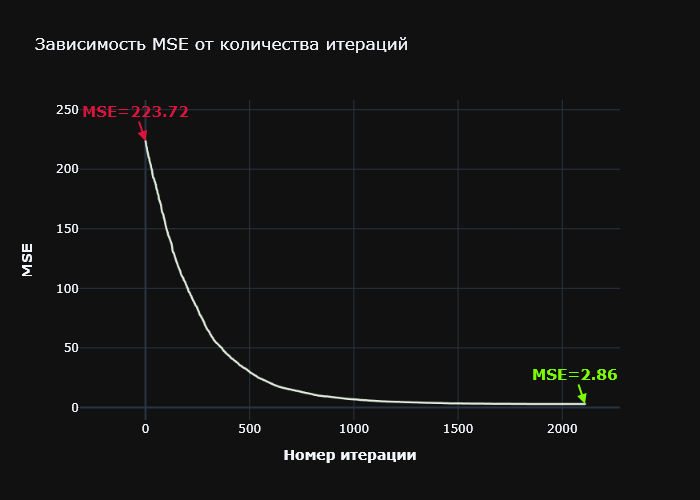

In [67]:
# ваш код
mse_df = pd.DataFrame(mse_list, columns=['MSE'])
line_plot = px.line(
    data_frame=mse_df,
    x=mse_df.index,
    y=mse_df['MSE'],
    labels={'index': '<b>Номер итерации</b>', 'MSE': '<b>MSE</b>'},
    title='Зависимость MSE от количества итераций',
    height=500,
    width=700,
    color_discrete_sequence=px.colors.carto.Mint
)
line_plot.add_annotation(
    showarrow=True, x=0, y=mse_list[0], arrowhead=2, text=f'<b>MSE={round(mse_list[0], 2)}</b>',
    arrowwidth=2, arrowsize=1, arrowcolor='#DC143C', arrowside='end', font={'color': '#DC143C', 'size': 15})
line_plot.add_annotation(
    showarrow=True, x=len(mse_list)-1, y=mse_list[-1], arrowhead=2, text=f'<b>MSE={round(mse_list[-1], 2)}</b>', 
    arrowwidth=2, arrowsize=1, arrowcolor='#7CFC00', arrowside='end', font={'color': '#7CFC00', 'size': 15})
line_plot.show('png')

**Выведите среднеквадратичную ошибку на последней итерации.**

In [68]:
# ваш код
print('MSE на последней итерации:', round(mse_list[-1], 3))

MSE на последней итерации: 2.855


### Выводы:

Разница между библиотечной линейной регрессией и ручной реализацией координатного спуска незаметна, значение Loss-функции одинаковы, коэффициенты идентичны.
Стохастический градиентный спуск показал результат немного хуже, чем предыдущие 2 способа. Данный метод требует более точной настройки гиперпараметров (шаг спуска 
$n$, количество итераций, минимальное расстояние между векторами весов), поэтому без подбора гиперпараметров показал такой результат.
По графику зависимости MSE от шага итераций можно заметить, что до $~1000$ 
-й итерации значение функции потерь очень быстро стремится к нулю, а после $~1000$ 
-й незначительно улучшается, приближаясь к значению, к которому сошлись другие 2 алгоритма. Стоит упомянуть, что этот график отражает зависимость исключительно для конкретных значений гиперпараметров.
